FROM README FILE: * You must include a written description of three observable trends based on the data.

1) Based on the scatter plot, visually, the Urban rides have the larger count and lowest fares. 
2) In contrast, the Rural rides have the least count and highest fares, with Suburban nestled between Urban & Rural. The higher fares probably reflect the low volume of drivers and longer distances in Rural areas, in contrast to more drivers and shorter travel distance in Urban areas. 
3) Suburban ride fares average  30𝑡𝑜 35 when the daily ride count is 10 to 25 rides.

In [1]:
%matplotlib
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
city_results = pd.read_csv(city_data)
ride_results = pd.read_csv(ride_data)

city_results.head()

Using matplotlib backend: Qt5Agg


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Combine the data into a single dataset
combined_ride_data = pd.merge(city_results,ride_results,on="city")
# Display the data table for preview
ride_results.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Calculate Type Percents
group_type = combined_ride_data.groupby("city")
avg_fare = group_type.mean()["fare"]
total_rides = group_type.count()["ride_id"]
total_drivers = group_type.count()["driver_count"]
city_dataset = city_results.set_index("city")["type"]
final_df = pd.DataFrame({"Average Fare":avg_fare,"Total Rides":total_rides,"Total Drivers":total_drivers,"City Type":city_dataset})

final_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,18,Urban
Barajasview,25.332273,22,22,Urban
Barronchester,36.422500,16,16,Suburban
Bethanyland,32.956111,18,18,Suburban
Bradshawfurt,40.064000,10,10,Rural


In [4]:
# DF for each city type- urban, suburban and rural

urban = final_df.loc[final_df["City Type"]=="Urban"]
suburb = final_df.loc[final_df["City Type"]=="Suburban"]
rural = final_df.loc[final_df["City Type"]=="Rural"]

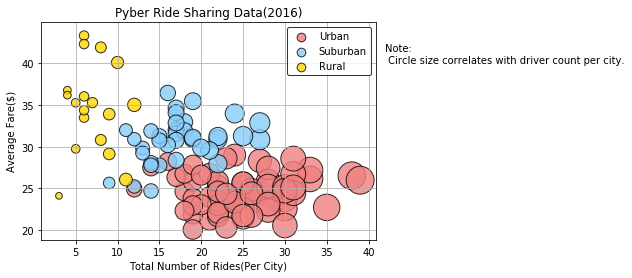

In [5]:
# create the scatter plot with varying size bubbles

plt.scatter(urban["Total Rides"],urban["Average Fare"],s = urban["Total Drivers"]*20, marker="o",color ="LightCoral", edgecolors="black", alpha =0.8, label = "Urban")
plt.scatter(suburb["Total Rides"],suburb["Average Fare"],s = suburb["Total Drivers"]*15, marker="o",color ="LightSkyBlue", edgecolors="black", alpha =0.8, label = "Suburban")
plt.scatter(rural["Total Rides"],rural["Average Fare"],s = rural["Total Drivers"]*15, marker="o",color ="Gold", edgecolors="black",alpha =0.8, label = "Rural")
plt.grid()
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Create a legend in the upper right corner
lgnd = plt.legend(loc= "upper right",frameon = True, edgecolor = "black")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.text(42,40,"Note:\n Circle size correlates with driver count per city.")
plt.show()

In [6]:
# Build pie chart properties
labels = ["Rural","Suburban","Urban" ]
colors = ["Gold","Lightskyblue","Lightcoral"]
explode = (0, 0,.15)

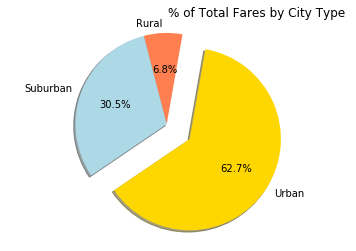

In [7]:
# Total fares by city type
ride_results = combined_ride_data.groupby("type")
total_fares = ride_results.sum()["fare"]
total_fares
explode=[0,0,0.3]
total_fares.index

plt.pie(total_fares,explode=explode,labels=total_fares.index,colors=["coral","lightblue","gold"], 
        shadow=True,startangle= 80,autopct = "%1.1f%%")
plt.title("% of Total Fares by City Type",loc="right")
plt.axis("equal")

plt.show()

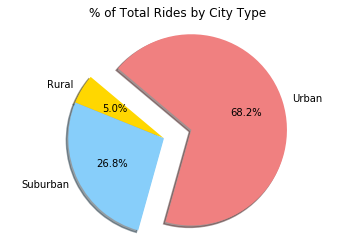

In [12]:
# Calculate Ride Percents
rides_results = combined_ride_data.groupby("type").sum()["ride_id"]

# Build Pie Chart
plt.pie(rides_results, startangle = 140, explode = explode, colors = colors, wedgeprops = {'linewidth': 1.5}, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Plot, label, and save figure
plt.savefig
plt.show()

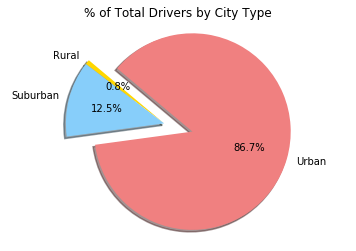

In [10]:
# Calculate percent of total drivers by city type
driver_total = combined_ride_data.groupby("type").sum()["driver_count"]

# Build Pie Chart
plt.pie(driver_total, startangle = 140, explode = explode, wedgeprops = {'linewidth': 1.5}, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Plot, label, and save figure
plt.savefig
plt.show("figures/% of Total Drivers by City Type")

END HW